### LangGraph with multiple inputs

In [9]:
from typing import TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    values: list[int]
    name: str
    operation: str
    result: str


In [11]:
from functools import reduce

def operation_function(state: AgentState) -> AgentState:
    value = 0
    if state["operation"] == "+":
        value = sum(state["values"])
    elif state["operation"] == "*":
        value = reduce(lambda x, y: x*y, state["values"])
    state["result"] = f"Hi {state['name']}, your answer is {value}"
    return state

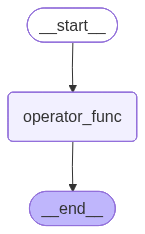

In [21]:
graph = StateGraph(AgentState)
graph.add_node("operator_func", operation_function)
graph.set_entry_point("operator_func")
graph.set_finish_point("operator_func")
app = graph.compile()
app

In [ ]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png))

In [23]:
answer = app.invoke({"name": "kiran", "values": [1,2,3,4], "operation": "+"})
answer["result"]

'Hi kiran, your answer is 10'